In [4]:
import matplotlib.pyplot as plt
import numpy as np
from fileloader import * 
from decimal import *
%matplotlib qt5

fig = plt.figure(figsize=(14,10))
#val1 = load_timestep("/Users/max/git/Ahti/cmake-build-debug/bin/wf_out.h5",0, t0=1,dtype="wf")
x,dx = np.linspace(-8.0, 8.0, 3000,retstep=True)

dt = 0.16

val1 = np.sqrt(1./2.) * 0.751125544464942 * np.exp(-x**2 * 0.5) * (np.exp(-1j * ( 0.5  * 50 *  dt)) + np.sqrt(1/2.) * 2 * x * np.exp
                                                                   (-1j * ( 1.5  * 50 *  dt)))


#plt.subplot(211)
plt.plot(x, val1.imag, "--",label=r"Imag analytical",linewidth=3.0)

plt.plot(x,val1.real, "--", label=r"Real analytical",linewidth=3.0)

plt.plot(x, np.abs(val1)**2, "--", c="m", label=r"$|\Psi^2| analytical$",linewidth=3.0)


val2 = load_timestep("/Users/max/git/Ahti/cmake-build-release/bin/wf_out.h5", 49,dtype="wf")
#val2 = load_timestep("/Users/max/git/Ahti/cmake-build-debug/bin/coef_out_0.h5", 0,dtype="co")

#val2 *= np.exp(-1j * 0.033594675913)


plt.xlabel(r"Location $(a.u.)$",size=12)
plt.ylabel(r"$\psi$",size=12)

plt.plot(x, val2.real, label=r"Real numerical")
plt.plot(x, val2.imag, label=r"Imag Numerical")

plt.plot(x, np.abs(val2)**2, c="blue",label=r"$|\Psi|^2$ numerical")
plt.title(r"Time evolution of harmonic Oscillator ground state at $t_i={0:.2f} \; a.u$".format(dt*20))
plt.legend(loc=1)
#plt.plot(x[1000:4000],np.abs((val1.imag - val2.imag)/val1.imag )[1000:4000], label=r"Relative error in imaginary part")
#plt.plot(x[1000:4000],np.abs((val1.real - val2.real)/val1.real)[1000:4000], label= r"Relative error in real part")
#plt.subplot(212)
#plt.plot(x[500:4500], np.abs((val2.real-val1.real)/val1.real)[500:4500],label=r"Relative error real part")
#plt.plot(x[500:4500], np.abs((val2.imag-val1.imag)/val1.imag)[500:4500],label=r"Relative error imaginary part")
#plt.xlabel(r"Location $(a.u.)$",size=12)
#plt.ylabel(r"$|\Delta \Psi_{rel}|$",size=12)
#plt.legend(loc="best")
plt.show()

Using dtype=wf


Using dtype=wf


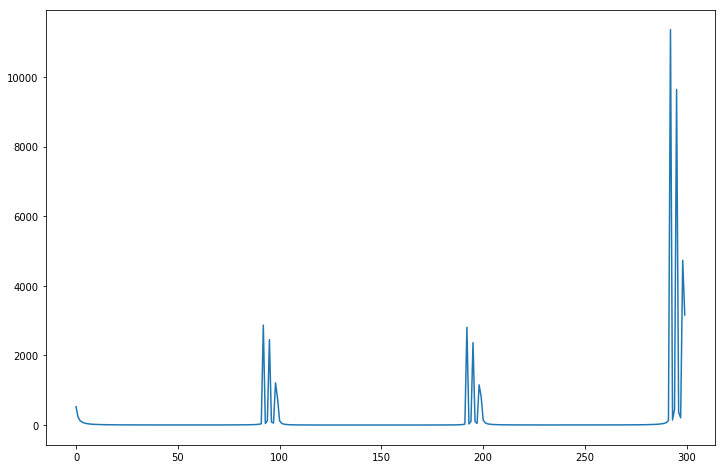

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from fileloader import * 



E = np.linspace(-300/2+1,300/2,300)
val2 = load_timestep("/Users/max/git/Ahti/cmake-build-release/bin/spec_fun.h5", 0,dtype="wf")
fig = plt.figure(figsize=(12,8))
plt.plot(np.abs(val2)**2)
plt.show()



In [7]:
np.sqrt(1/2)

0.70710678118654757

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5

gc = lambda x: 0.7511255444649425 * np.exp(- x**2 / 2)

x,dx = np.linspace(-10.0, 10.0, 1000, retstep=True)

psi = gc(x)

psi_c = np.fft.fft(psi)

psi = np.zeros(psi_c.size)
for i in range(0, 1000):
    for j in range(0, psi_c.size):
        psi[i] += psi_c[j] * np.exp(1j * 2*np.pi/20.0 * i * (-10.0 + i * dx))

plt.plot(x, psi.real)
plt.plot(x, psi.imag)
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
